##
## House Prices: Advanced Regression Techniques

#### Importing Libraries

In [3]:
# Importing libraries
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, \
    make_scorer, f1_score, recall_score, precision_score

# plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Full Data, and Data Cleaning

In [6]:
full = train.merge(test, how='outer')

In [7]:
full.Alley.fillna('NoAlley', inplace=True)

In [8]:
full.LotFrontage.describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<ipython-input-9-6b46680801fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full.LotFrontage.dropna())


<Axes: xlabel='LotFrontage', ylabel='Density'>

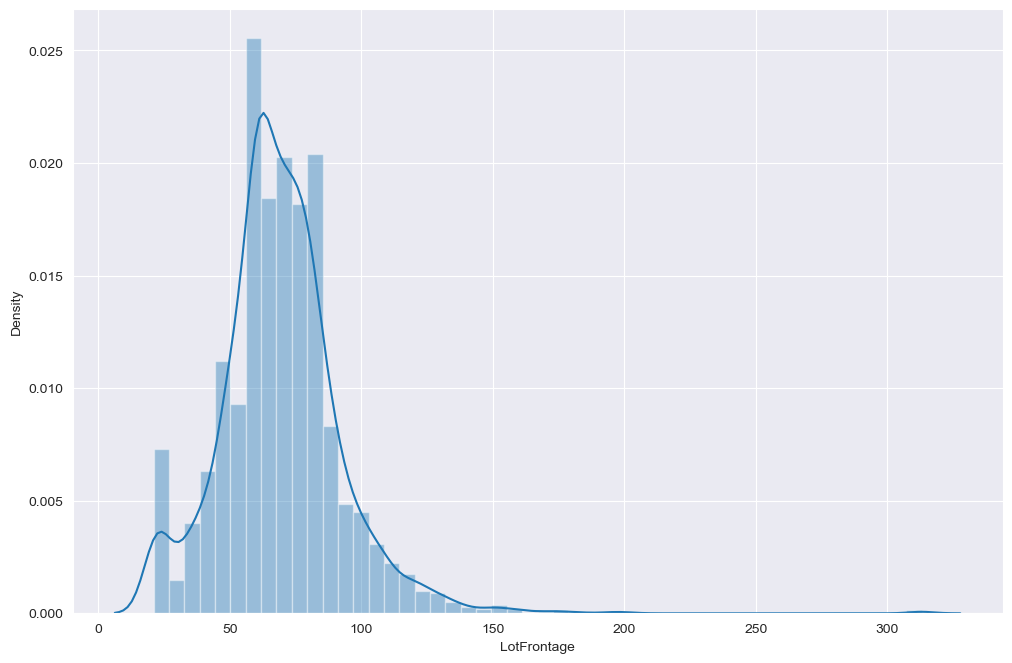

In [9]:
plt.figure(figsize=(12, 8), dpi=100)
sns.distplot(full.LotFrontage.dropna())

In [10]:
full.LotFrontage.fillna(full.LotFrontage.median(), inplace=True)

In [11]:
full.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [12]:
full.Utilities.fillna('AllPub', inplace=True)

<BarContainer object of 15 artists>

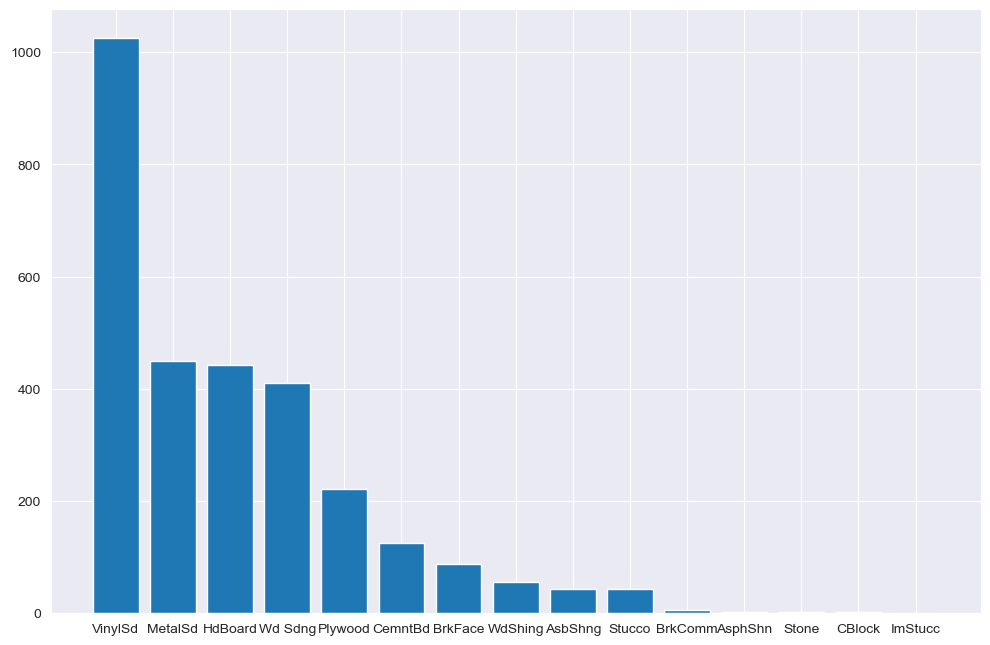

In [13]:
plt.figure(figsize=(12, 8), dpi=100)
plt.bar(full.Exterior1st.value_counts().index, full.Exterior1st.value_counts())

In [14]:
full.Exterior1st.value_counts()
full.Exterior1st.fillna('VinylSd', inplace=True)

In [15]:
full.MSZoning.value_counts()
full.MSZoning.fillna('RL', inplace=True)

In [16]:
full.Exterior2nd.value_counts()
full.Exterior2nd.fillna('VinylSd', inplace=True)

In [17]:
full.MasVnrType.fillna('None', inplace=True)

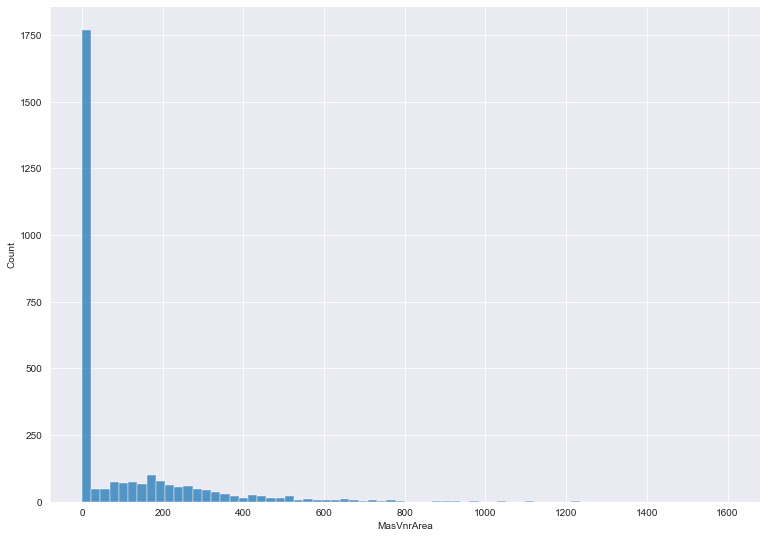

In [18]:
sns.displot(full.MasVnrArea.dropna()).fig.set_size_inches(12, 8)

In [19]:
full.MasVnrArea.fillna(0, inplace=True)

In [20]:
full.BsmtQual.fillna('NoBsmt', inplace=True)
full.BsmtCond.fillna('NoBsmt', inplace=True)
full.BsmtExposure.fillna('NoBsmt', inplace=True)
full.BsmtFinType1.fillna('NoBsmt', inplace=True)
full.BsmtFinType2.fillna('NoBsmt', inplace=True)

In [21]:
full.BsmtFinSF1.fillna(0, inplace=True)
full.BsmtFinSF2.fillna(0, inplace=True)
full.BsmtUnfSF.fillna(0, inplace=True)
full.TotalBsmtSF.fillna(0, inplace=True)

In [22]:
full.Electrical.fillna('SBrkr', inplace=True)
full.BsmtFullBath.fillna(0, inplace=True)
full.BsmtHalfBath.fillna(0, inplace=True)

In [23]:
full.KitchenQual.fillna('TA', inplace=True)
full.Functional.fillna('Typ', inplace=True)

In [24]:
full.FireplaceQu.fillna('NoFireplace', inplace=True)
full.GarageType.fillna('NoGarage', inplace=True)
full.GarageYrBlt.fillna(0, inplace=True)
full.GarageFinish.fillna('NoGarage', inplace=True)
full.GarageQual.fillna('NoGarage', inplace=True)
full.GarageCond.fillna('NoGarage', inplace=True)
full.GarageCars.fillna(0, inplace=True)
full.GarageArea.fillna(0, inplace=True)
full.PoolQC.fillna('NoPool', inplace=True)
full.Fence.fillna('NoFence', inplace=True)
full.MiscFeature.fillna('None', inplace=True)
full.SaleType.fillna('WD', inplace=True)

In [25]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# LabelEncoder
LE = LabelEncoder()


def label_encoder(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            LE.fit(data[col])
            data[col] = LE.transform(data[col])
    return data

In [28]:
full = label_encoder(full)

In [29]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC